In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Problem Statement: The Advertising dataset captures sales revenue generated with respect to advertisement spends 
across multiple channels like radio, tv, and newspaper.

Build a linear regression model to:
    1. Interpret the coefficients of the model
    2. Make predictions
    3. Find and analyze model residuals
    4. Evaluate model efficiency using RMSE and R-Square values

In [22]:
# Import the data

Advertise_df = pd.read_csv('Advertising.csv', index_col=0)
Advertise_df.head()
Advertise_df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
Advertise_df.shape

(200, 4)

In [25]:
Advertise_df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Let's have a look at the relationship betwee features and target variable Sales using scatter plots

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

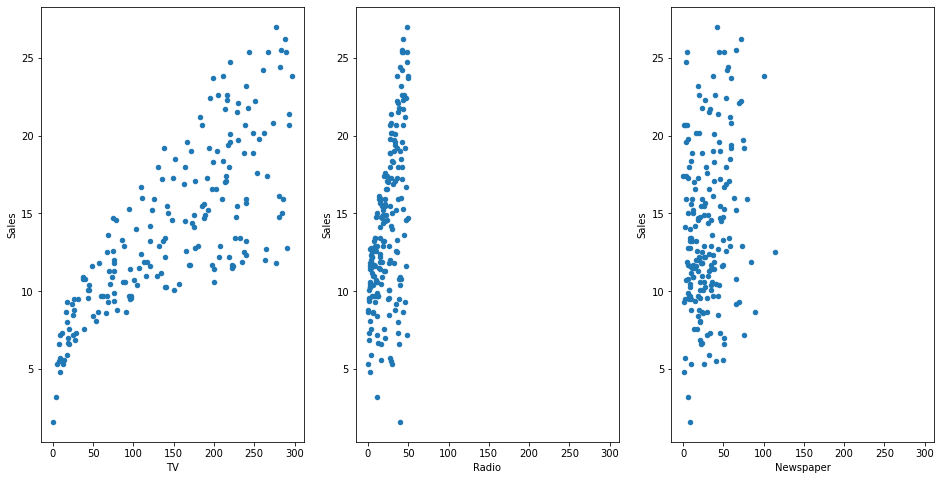

In [24]:
fig, axes = plt.subplots(1,3, sharex = True,figsize = (16,8))

Advertise_df.plot(kind = 'scatter', x = 'TV', y = 'Sales', ax = axes[0])
Advertise_df.plot(kind = 'scatter', x = 'Radio', y = 'Sales', ax = axes[1])
Advertise_df.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', ax = axes[2])

In [43]:
# Independent and dependent variable
# Using TV as a Feature ( dependent variable) and Sales is the dependent Variable

X = Advertise_df[['TV']]
Y = Advertise_df.Sales

In [44]:
# Importing linear regression model from sklearn

from sklearn.linear_model import LinearRegression

# Initializing the model

LR = LinearRegression()

# Fitting the model 

LR.fit(X,Y)

LinearRegression()

In [46]:
# Print Intercept and Coefficient of the linear equation

b = LR.intercept_
print(b)

m = LR.coef_
print(m)

7.032593549127695
[0.04753664]


In [47]:
# Use above values to calculate new value for sales with the feature value of 50

# y = m * X + b

0.04753664 * 50 + 7.032593549127695

9.409425549127695

In [49]:
# Let's predict new X value

X_new = pd.DataFrame({'TV' : [50]})
X_new

,TV
0,50


In [51]:
# Using above equation, we now predict the sales

LR.predict(X_new)

array([9.40942557])

In [52]:
# Let's make predictions for smallest and largest observations of X use the predicted value to plot least squares line

X_new = pd.DataFrame({'TV' : [Advertise_df.TV.min(), Advertise_df.TV.max()]})
X_new

,TV
0,0.7
1,296.4


In [54]:
Predictions = LR.predict(X_new)

In [55]:
Predictions

array([ 7.0658692 , 21.12245377])

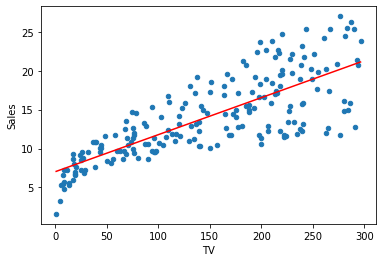

In [58]:
# Initializing scatter plot for TV and sales
# plotting the least squares line

Advertise_df.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.plot(X_new, Predictions, 'r')

In [72]:
# Importing statsmodels

import statsmodels.formula.api as smf

# Apply ols on TV sales

LR = smf.ols(formula = 'Sales ~ TV', data = Advertise_df).fit()
LR.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [73]:
# Printing p values
LR.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

The output shows the pvalues for the model coefficients. The pvalue represnts the possibility that the coefficient is actually 0. In this case, the pvalue for TV is far less than 0.05. Hence, there is a relationship between TV adds and sales

In [74]:
# How well the model fits the data, we can check this using R square Value

from sklearn.metrics import r2_score, mean_squared_error

LR.rsquared

0.611875050850071

# Multiple Linear Regression

In [77]:
# Let's take all other features that includes Radio, Newspaper

X_all = Advertise_df[['TV', 'Radio', 'Newspaper']]
y_all = Advertise_df.Sales

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.3, random_state=42)

In [83]:
# Apply Linear Regression

LR_1 =LinearRegression()

In [85]:
# Fit the data

LR_1.fit(X_all, y_all)

LinearRegression()

In [86]:
# Intercept and slope

b_1 = LR_1.intercept_
print(b_1)

m_1 = LR_1.coef_
print(m_1)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [87]:
# Fit train data set

LR_1.fit(X_train, y_train)

LinearRegression()

In [88]:
b_2 = LR_1.intercept_
print(b_2)

m_2 = LR_1.coef_
print(m_2)

2.7089490925159065
[0.04405928 0.1992875  0.00688245]


In [89]:
# Predit the test data result

Predictions_1 = LR_1.predict(X_test)
Predictions_1

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [97]:
# Print root mean square, to see how well the model fits
from math import *

MSE = (mean_squared_error(y_test, Predictions_1))
print(sqrt(MSE))

1.9485372043446387


In [99]:
LR_1 = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = Advertise_df).fit()
LR_1.conf_int()
LR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        03:15:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. TV and Radio has significant pvalue, whereas Newspaper doesn't. Thus we reject null hypothesis for TV and Radio.
2. This model has higher R-Squared value. i.e., this model provides better fit to the data.